# RNN Syntax Basics

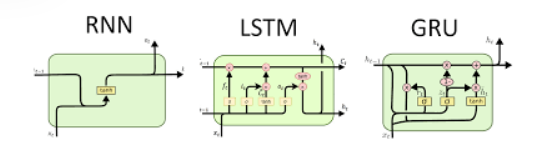

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Creating Data

We will create our own data (sequence). We determined 501 numbers between 0 and 50 with linspace. We took the sin values ​​of these points and assigned these values ​​to y.

In [22]:
x = np.linspace(0,50,501)
y = np.sin(x)

In [23]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

The maximum value of the sine function is 1 and its minimum value is -1.

In [24]:
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

Our goal is to make a forecast by estimating the next values ​​of the dataset:

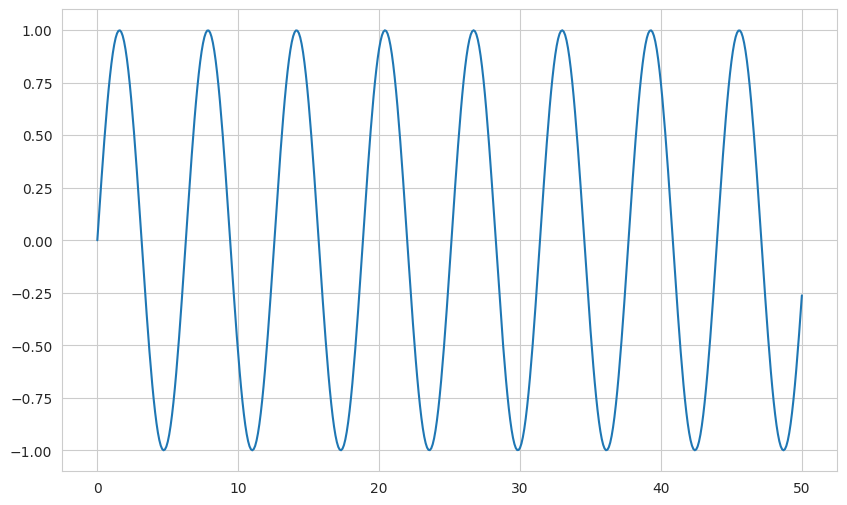

In [25]:
plt.plot(x,y)

Let's turn this into a DataFrame

In [26]:
df = pd.DataFrame(data=y,index=x,columns=['Sine'])

A dataframe with a single feature was created:

In [27]:
df

,Sine
0.000,0.000
0.100,0.100
0.200,0.199
0.300,0.296
0.400,0.389
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


The variable 'x' represents the data used as the index, while the variable 'y' represents the data used as the 'Sine' column. This code aims to create a DataFrame using the 'y' data as the 'Sine' column and the 'x' data as the index.

## Preprocessing of Data

### Train Test Split

In [28]:
len(df)

501

Up until now, we were doing a random division process while separating the test and train data. Here, we will not divide our data randomly because the order of our data is important. Therefore, we will separate a certain part from the last part of our data as test data.

In [29]:
test_percent = 0.15

The 15% part corresponds to the 75th index in our dataset:

In [30]:
len(df)*test_percent

75.14999999999999

To get rid of fractions, we assigned the length of the data up to 75 to a variable with round:

In [31]:
test_point = np.round(len(df)*test_percent)
test_point

75.0


If we subtract this value from the actual length of df, we are left with the data we will use for the train part. The data from the beginning to 426 will be the train data, and the rest will be the test data:

In [32]:
test_ind = int(len(df) - test_point)
test_ind

426

We took the part up to test_ind as train data and the part after test_ind as test data:

In [33]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [34]:
train, test

(         Sine
 0.000   0.000
 0.100   0.100
 0.200   0.199
 0.300   0.296
 0.400   0.389
 ...       ...
 42.100 -0.952
 42.200 -0.978
 42.300 -0.994
 42.400 -1.000
 42.500 -0.996
 
 [426 rows x 1 columns],
          Sine
 42.600 -0.982
 42.700 -0.959
 42.800 -0.925
 42.900 -0.883
 43.000 -0.832
 ...       ...
 49.600 -0.617
 49.700 -0.536
 49.800 -0.449
 49.900 -0.357
 50.000 -0.262
 
 [75 rows x 1 columns])

## Scaling

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [38]:
train_scaled[:10]

array([[0.49999912],
       [0.54991622],
       [0.59933458],
       [0.64776041],
       [0.69470985],
       [0.73971381],
       [0.78232262],
       [0.82211054],
       [0.85868004],
       [0.89166571]])

In [39]:
test_scaled[:10]

array([[0.00885189],
       [0.02065929],
       [0.0372561 ],
       [0.05847648],
       [0.08410841],
       [0.11389578],
       [0.14754097],
       [0.1847078 ],
       [0.22502492],
       [0.2680895 ]])

## Time Series Generator

TimeSeriesGenerator does not modify the data. This class is used to divide time series data into groups of data with a certain structure and feed these groups into a training or prediction model. That is, it applies a view or windowing approach to the data, but does not change the data.

Therefore, your original dataset is unchanged and preserved when using TimeSeriesGenerator. This class is used to make the data fit the model better or to make the model perform better.

In [40]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

TimeSeriesGenerator ---> It performs similar operations to ImageDataGenerator in CNN.

We used train_scaled data as data and targets in the generator. Because the feature that will make the prediction in RNN and the target label are the same feature.

__length=3 --->__ length of the sequences. "Guess the 4th according to the information you get from 3 rows."
batch_size ---> 'How many data will there be in a batch according to the condition above?' We did it one by one here, but it is not possible to do this in large datasets. (It is recommended to do it one by one if possible.)

In [41]:
# define generator
length = 2 # Length of the output sequences (in number of timesteps)
batch_size = 1 # Number of timeseries samples in each batch
stride = 1 # Period between successive output sequences
generator = TimeseriesGenerator(data = train_scaled,                   # train datasi
                                targets = train_scaled,
                                length = length,
                                batch_size = batch_size,
                                stride = stride)

In [42]:
len(train_scaled)

426

Although there are 426 scaled data, Generator created 424 data. Since length=2, there is no data left to make the prediction after the last two values ​​of the dataset. Therefore, it cannot use the last two rows. The number of generators is calculated with the formula; len(generator)= (len(train)-lenght)/(batch_size*stride).

In [43]:
len(generator) # = (len(train)-lenght)/(batch_size*stride)
# 426-2/1x1

424

In [44]:
generator

Generator gave t_train and y_train values ​​at index 0. There are 2 values ​​in x_train due to length. The 3rd value will be predicted according to these two values:

In [45]:
generator[0]

(array([[[0.49999912],
         [0.54991622]]]),
 array([[0.59933458]]))

In [46]:
# What does the first batch look like?
X, y = generator[0]

Generator' i daha rahat gorebilmek icin X ve y' ye attik. Sonra yazdirdik. Verilen array' ler ve tahmin edilmesi gereken 3. satiri görüyoruz :

In [47]:
print(f'Given the Array: \n{X}')
print(f'Predict this y: \n{y}')

Given the Array: 
[[[0.49999912]
  [0.54991622]]]
Predict this y: 
[[0.59933458]]


We can also see the first 3 values ​​in the train_scaled data belo

In [48]:
train_scaled[:10]

array([[0.49999912],
       [0.54991622],
       [0.59933458],
       [0.64776041],
       [0.69470985],
       [0.73971381],
       [0.78232262],
       [0.82211054],
       [0.85868004],
       [0.89166571]])

We changed the following parameter values ​​and compare the difference with the previous one:

In [49]:
# define generator
length = 3 # Length of the output sequences (in number of timesteps)
batch_size = 2 # Number of timeseries samples in each batch
stride = 2 # Period between successive output sequences
generator = TimeseriesGenerator(data = train_scaled,                   # train datasi
                                targets = train_scaled,
                                length = length,
                                batch_size = batch_size,
                                stride = stride)

In [50]:
len(train_scaled)

426

In [51]:
len(generator)     # (len(train)-lenght)/(batch_size*stride)

106

It produced 106 generators. (426 - 3)/(2 *2) = 106

In [52]:
generator

It will predict the value 0.64776041 from the first triple and the value 0.73971381 from the next triple:

In [53]:
generator[0]

(array([[[0.49999912],
         [0.54991622],
         [0.59933458]],
 
        [[0.59933458],
         [0.64776041],
         [0.69470985]]]),
 array([[0.64776041],
        [0.73971381]]))

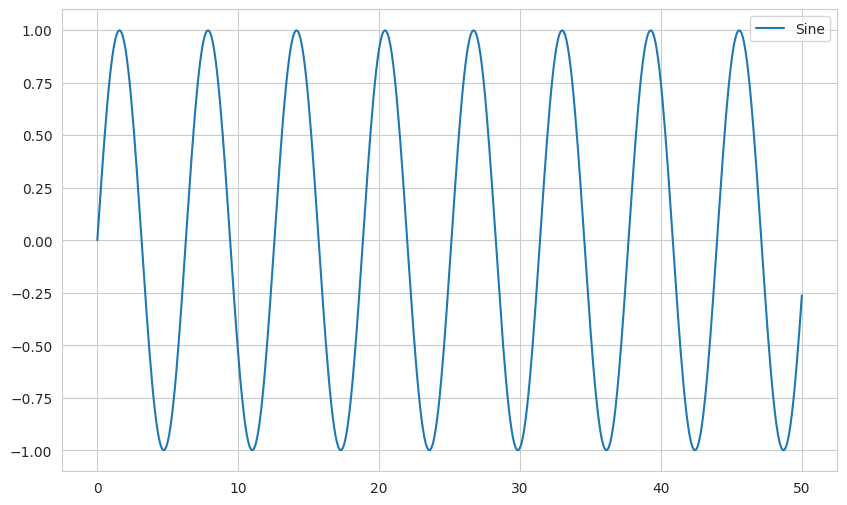

In [54]:
df.plot();

The more length the more training time

How should the length value be calculated? : We need to obtain a period that renews itself. Our first value started from 0, so when it reaches 0 again, a period is completed. There are 501 points in the data, if we calculate based on this, we find the point where the first period is completed as 64. We can say that there is a period that repeats itself every 64. We created the generator by choosing batch_size=1 :

In [55]:
length = 64 # Length of the output sequences (in number of timesteps)
batch_size = 1 # Number of timeseries samples in each batch
generator = TimeseriesGenerator(data = train_scaled, targets = train_scaled, length = length, batch_size = batch_size)

In [56]:
# What does the first batch look like?
X, y = generator[0]

426 - 64 = 362 generator

In [57]:
len(generator)

362

64 data will be given to the model, and the 65th number will be predicted accordingly:

In [58]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n{y}')

Given the Array: 
[4.99999116e-01 5.49916225e-01 5.99334579e-01 6.47760405e-01
 6.94709850e-01 7.39713809e-01 7.82322618e-01 8.22110545e-01
 8.58680040e-01 8.91665714e-01 9.20737985e-01 9.45606372e-01
 9.66022399e-01 9.81782075e-01 9.92727935e-01 9.98750612e-01
 9.99789928e-01 9.95835500e-01 9.86926839e-01 9.73152957e-01
 9.54651478e-01 9.31607263e-01 9.04250562e-01 8.72854714e-01
 8.37733417e-01 7.99237589e-01 7.57751870e-01 7.13690771e-01
 6.67494535e-01 6.19624741e-01 5.70559686e-01 5.20789614e-01
 4.70811810e-01 4.21125636e-01 3.72227539e-01 3.24606094e-01
 2.78737119e-01 2.35078919e-01 1.94067715e-01 1.56113277e-01
 1.21594831e-01 9.08572769e-02 6.42077324e-02 4.19124713e-02
 2.41942605e-02 1.12301346e-02 3.14962674e-03 3.34747619e-05
 1.91281421e-03 8.76886734e-03 2.05331307e-02 3.70880598e-02
 5.82682430e-02 8.38620552e-02 1.13613771e-01 1.47226122e-01
 1.84363264e-01 2.24654135e-01 2.67696162e-01 3.13059283e-01
 3.60290246e-01 4.08917133e-01 4.58454081e-01 5.08406134e-01]
Predi

## Modelling

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [60]:
# We're only using one feature in our time series
n_features = 1

In [61]:
seed = 42

We added a hidden layer to the model.

units= 128 --> Hidden layer' da 128 tane nöron olsun.

input_shape=(length, n_features)) --> Ilk eleman satir sayisi, ikinci eleman sütun sayisini verir. length=64 satir sayisi, n_features=1 sütun sayisi.

model.add(Dense(units = 1)) --> There is 1 neuron in the Output layer. (Since we are doing regression analysis, there should be only one neuron.)

RNN (Recurrent Neural Network) models usually use the loss metric instead of the accuracy metric. The reason for this is that RNN models are often used in data sets with continuous values ​​such as time series.

While the accuracy metric is used for classification problems, RNN models are usually used in regression problems. In regression problems, the target variables are continuous numerical values ​​and the aim is to estimate these values ​​directly. Therefore, loss metrics (mse, rmse, etc.) are usually used.

Both Hyperbolic Tangent (tanh) and ReLU (Rectified Linear Unit) activation functions can be used in recurrent neural networks (RNN).

The hyperbolic tangent (tanh) function is an activation function commonly used in RNNs. The tanh function limits the input values ​​between -1 and 1 and produces negative outputs for negative values, while it produces positive outputs for positive values. Therefore, it can be preferred to provide a suitable range for the values ​​of hidden states in RNNs.

The ReLU (Rectified Linear Unit) function is also an activation function that can be used in RNNs. The ReLU function outputs the same value if the input value is greater than 0, and zero if it is less than 0. The advantages of ReLU include high computational speed and the ability to spread the gradient smoothly.

Which activation function you will use depends on your problem and the characteristics of your data set. Both functions may be suitable for different situations. Therefore, it is important to try both the tanh and ReLU functions in your RNNs and observe which one gives better results.

In [62]:
# define model
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(units = 128, activation = "tanh", input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(units = 1))

model.compile(optimizer='adam', loss='mse')

The input_shape parameter specifies the size of the input data. length represents the number of time steps in the input sequence, and n_features represents the number of features used at each time step.

There are too many parameters in the hidden layer. If we had built an ANN model, there would have been much fewer parameters. (If we had used LSTM instead of Simple RNN, we would have 4 layers of parameters because there are 4 gates):

In [63]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 128)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,769 (65.50 KB)

 Trainable params: 16,769 (65.50 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
model.fit(generator, epochs = 6)

Epoch 1/6
362/362 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0395
Epoch 2/6
362/362 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 5.6801e-05
Epoch 3/6
362/362 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 2.7736e-05
Epoch 4/6
362/362 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 2.1976e-04
Epoch 5/6
362/362 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 2.4819e-04
Epoch 6/6
362/362 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 2.2285e-05


Since we do not have validation data, we cannot see whether there is an overfit situation or not:

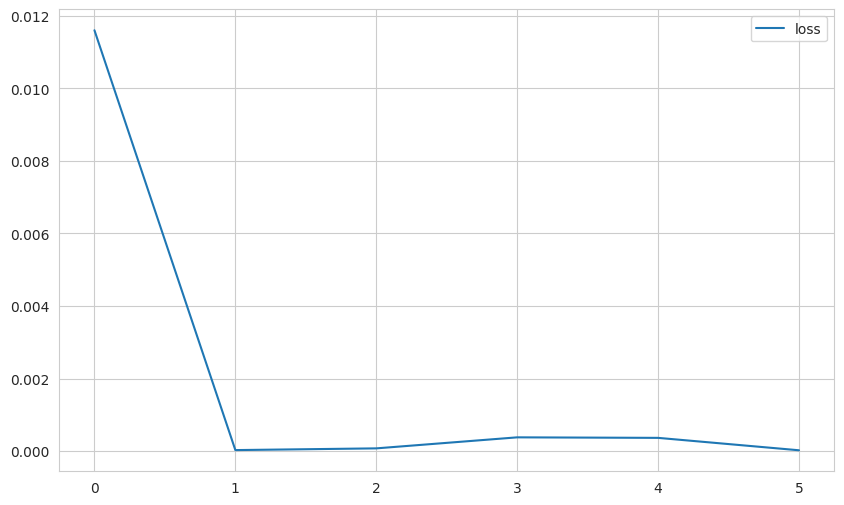

In [65]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

## Evaluate on Test Data
To evaluate the data, we need to make a forecast on the train data. We will take the data that is our length from the end and try to predict the next step according to this data. We will add the prediction we made to the data and move the sequence forward and try to predict the next step. In this way, we will add the new predictions to the end and predict the next steps in order and go as many steps as we want. (It is recommended to make a forecast as long as length). Since our data here is simple data, we can extend the forecast process.

In [66]:
first_eval_batch = train_scaled[-length:]

We took the data from the end of the data to length (Last 64 values):

In [67]:
first_eval_batch.shape

(64, 1)

The shape of the data is (64,1) but the shape expected by the model is (1,64,1), which is 3D.

In [68]:
generator[0][0].shape

(1, 64, 1)

There are 2 methods for changing the size. Two, increasing the size from 2 to 3 by putting 1 in front. The second is the expand_dim function:

In [69]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))
# first_eval_batch = np.expand_dims(first_eval_batch, axis=0)

In [70]:
first_eval_batch.shape

(1, 64, 1)

We can give the data whose size we set according to the model for prediction. The model will predict what the 65th value is according to the 64 values ​​in the data.

In [71]:
model.predict(first_eval_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


array([[0.00882546]], dtype=float32)

Buldugumuz bu tahmini, test datasinin ilk elemani ile kiyaslayacagiz. Model gercekten bu degere yakin bir tahmin yapti. Yapilan prediction 2 boyutlu bir array :

In [72]:
test_scaled[0]

array([0.00885189])

IN SUMMARY; We created an empty set named test_prediction. We will throw our predictions into this empty set. We threw the data that is the last length of the train data into the first_eval_batch variable, we increased its size from 2 to 3 with reshape. We will define these in the for loop below:

In [73]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [74]:
current_batch.shape

(1, 64, 1)

In [75]:
current_batch

array([[[1.27922981e-03],
        [7.34597031e-03],
        [1.83351382e-02],
        [3.41369333e-02],
        [5.45934694e-02],
        [7.95003514e-02],
        [1.08608718e-01],
        [1.41627728e-01],
        [1.78227467e-01],
        [2.18042242e-01],
        [2.60674236e-01],
        [3.05697486e-01],
        [3.52662133e-01],
        [4.01098922e-01],
        [4.50523890e-01],
        [5.00443198e-01],
        [5.50358069e-01],
        [5.99769769e-01],
        [6.48184595e-01],
        [6.95118799e-01],
        [7.40103433e-01],
        [7.82689024e-01],
        [8.22450070e-01],
        [8.58989293e-01],
        [8.91941605e-01],
        [9.20977757e-01],
        [9.45807630e-01],
        [9.66183132e-01],
        [9.81900676e-01],
        [9.92803220e-01],
        [9.98781828e-01],
        [9.99776764e-01],
        [9.95778087e-01],
        [9.86825751e-01],
        [9.73009203e-01],
        [9.54466495e-01],
        [9.31382900e-01],
        [9.03989060e-01],
        [8.7

In [76]:
np.append(current_batch[:,1:,:], [[[0.0085]]], axis = 1)

array([[[7.34597031e-03],
        [1.83351382e-02],
        [3.41369333e-02],
        [5.45934694e-02],
        [7.95003514e-02],
        [1.08608718e-01],
        [1.41627728e-01],
        [1.78227467e-01],
        [2.18042242e-01],
        [2.60674236e-01],
        [3.05697486e-01],
        [3.52662133e-01],
        [4.01098922e-01],
        [4.50523890e-01],
        [5.00443198e-01],
        [5.50358069e-01],
        [5.99769769e-01],
        [6.48184595e-01],
        [6.95118799e-01],
        [7.40103433e-01],
        [7.82689024e-01],
        [8.22450070e-01],
        [8.58989293e-01],
        [8.91941605e-01],
        [9.20977757e-01],
        [9.45807630e-01],
        [9.66183132e-01],
        [9.81900676e-01],
        [9.92803220e-01],
        [9.98781828e-01],
        [9.99776764e-01],
        [9.95778087e-01],
        [9.86825751e-01],
        [9.73009203e-01],
        [9.54466495e-01],
        [9.31382900e-01],
        [9.03989060e-01],
        [8.72558686e-01],
        [8.3

Above, we had our model predict the 65th value according to 64 values ​​(0.0085). We discarded the first value and instead added the 65th prediction value we found to the last part with the np.append method:

np.append asks for an array, the prediction value to be added under the array and which axis it should be added to.

The part where we wrote current_batch[:,1:,:] ---> 1 is the part where we express the number of rows. By changing this part, we told it to start the index from 1, not 0. (The last dot is the number of columns). After this process, the number of rows decreased to 63. We added the new prediction value we found at the end, making it 3-dimensional. Thus, the number of samples was completed to 64 again.

## Final For Loop to predict step by step
We will do the same process we did above with a for loop for 75 test data. We defined the same codes we wrote above for the for loop. It will make predictions in every process along the length of the test data and put the prediction it made into the defined empty list. Finally, it will update current_batch and add the new prediction each time and remove a sample from the beginning. We will compare the forecast results obtained here with the test data later:

In [77]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):

    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)

    # store prediction
    predictions_scaled.append(current_pred[0])

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

In [78]:
predictions_scaled

[array([0.00882546], dtype=float32),
 array([0.02016816], dtype=float32),
 array([0.03614924], dtype=float32),
 array([0.0565972], dtype=float32),
 array([0.08129719], dtype=float32),
 array([0.11003294], dtype=float32),
 array([0.1425203], dtype=float32),
 array([0.17860976], dtype=float32),
 array([0.21804538], dtype=float32),
 array([0.26052505], dtype=float32),
 array([0.30562514], dtype=float32),
 array([0.35305992], dtype=float32),
 array([0.40239772], dtype=float32),
 array([0.4530944], dtype=float32),
 array([0.5046587], dtype=float32),
 array([0.55650705], dtype=float32),
 array([0.60802275], dtype=float32),
 array([0.6585836], dtype=float32),
 array([0.7075257], dtype=float32),
 array([0.7543621], dtype=float32),
 array([0.798552], dtype=float32),
 array([0.83951783], dtype=float32),
 array([0.87688047], dtype=float32),
 array([0.9102512], dtype=float32),
 array([0.9393446], dtype=float32),
 array([0.9638772], dtype=float32),
 array([0.98358953], dtype=float32),
 array([0.998

In [79]:
test_scaled

array([[8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],
       [5.58715219e-01],
       [6.07993616e-01],
       [6.56192968e-01],
       [7.02831682e-01],
       [7.47443761e-01],
       [7.89583454e-01],
       [8.28829716e-01],
       [8.64790412e-01],
       [8.97106234e-01],
       [9.25454293e-01],
       [9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],


## Inverse Transformations and Comparing
Before comparing the predictions with the real values, we transformed the prediction values ​​to real values ​​with inverse_transform so that we can compare:

This line of code helps to return the scaled predictions to the original data scale by performing a transformation operation. This operation is especially useful when the predictions need to be brought back to the original data range when the data is scaled.

Explanations:

predictions: This variable contains the scaled version of the predicted values. That is, these predictions may have been obtained after a certain scaling operation was applied.

scaler: This is a scaling object that represents the scaling operation or transformation used. This object performs the data transformation, especially when scaling methods such as Min-Max scaling or Standardization are used.

inverse_transform(): This method is used to return the scaled data to the original data range. That is, it returns the predictions from their scaled state to their original state.

As a result, the prediction values ​​in predictions are returned from their scaled state to the original data range using the scaler object and can be compared to the original values ​​or the results can be made more meaningful. This process ensures that the predictions are consistent with the original data scale.

In [80]:
predictions = scaler.inverse_transform(predictions_scaled)

In [81]:
predictions

array([[-0.98233943],
       [-0.9596542 ],
       [-0.9276923 ],
       [-0.88679672],
       [-0.83739713],
       [-0.7799261 ],
       [-0.71495191],
       [-0.64277356],
       [-0.56390294],
       [-0.47894429],
       [-0.38874483],
       [-0.29387604],
       [-0.19520122],
       [-0.09380869],
       [ 0.00931909],
       [ 0.11301496],
       [ 0.21604553],
       [ 0.31716639],
       [ 0.41504978],
       [ 0.5087219 ],
       [ 0.59710093],
       [ 0.67903198],
       [ 0.75375665],
       [ 0.82049758],
       [ 0.87868389],
       [ 0.92774872],
       [ 0.96717307],
       [ 0.99654111],
       [ 1.0156036 ],
       [ 1.02409409],
       [ 1.02190948],
       [ 1.00904738],
       [ 0.98562067],
       [ 0.95194384],
       [ 0.90845629],
       [ 0.85563984],
       [ 0.79418997],
       [ 0.72483695],
       [ 0.64843216],
       [ 0.565855  ],
       [ 0.47805257],
       [ 0.38595305],
       [ 0.29050437],
       [ 0.19270323],
       [ 0.09346086],
       [-0

In [82]:
test

,Sine
42.600,-0.982
42.700,-0.959
42.800,-0.925
42.900,-0.883
43.000,-0.832
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


We added predictions to the test data as a new column:

In [83]:
test['RNN_Predictions'] = predictions

In [84]:
test

,Sine,RNN_Predictions
42.600,-0.982,-0.982
42.700,-0.959,-0.960
42.800,-0.925,-0.928
42.900,-0.883,-0.887
43.000,-0.832,-0.837
...,...,...
49.600,-0.617,-0.617
49.700,-0.536,-0.542
49.800,-0.449,-0.462
49.900,-0.357,-0.377


The actual values ​​and the predicted values ​​are quite consistent:

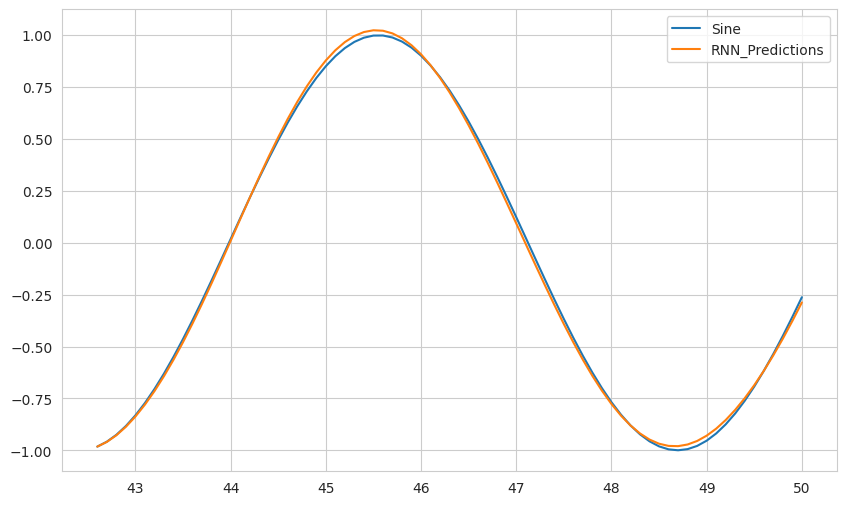

In [85]:
test.plot();

## Retrain and Forecasting
After looking at our model performance, we will create the model with all the data and make a forecast. We applied the scale process to all the data:

In [86]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

We gave all the data to the data and target sections in the TimeseriesGenerator. We gave the length and batch_size values ​​as the same as in the tutorial:

In [87]:
length = 64
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = 1)

In [88]:
# define model
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(units = 128, activation = "tanh", input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(units = 1))

model.compile(optimizer='adam', loss='mse')
model.fit(generator, epochs = 6)

Epoch 1/6
437/437 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0168
Epoch 2/6
437/437 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 9.6257e-05
Epoch 3/6
437/437 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 7.5376e-05
Epoch 4/6
437/437 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 4.6512e-04
Epoch 5/6
437/437 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 5.8808e-05
Epoch 6/6
437/437 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 6.4305e-05


The length of the forecast we will make will be as long as length, i.e. 64. We will not be able to compare the forecast results with anything. We will only visualize the forecasts by adding them to the continuation of the original df.

In [89]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):

    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)

    # store prediction
    forecast.append(current_pred[0])

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━

This code is used to implement the use of a time series forecast model and to predict future values. The process is carried out in the following steps:

an empty list named forecast is created. This list will be used to store future forecast values.

it is assumed that a data series named scaled_full_data will be worked on. This data series contains the time series for which the forecasts will be made.

first_eval_batch creates a data slice of a certain length starting from the end of the scaled_full_data array. This slice will be used to make the first prediction of the model.

current_batch reshapes the first_eval_batch array into an array. This represents the input data that the model will use to make the prediction.

The predictions are calculated using a loop. In each step, the following happens:

with model.predict(current_batch) the model calculates the forecast value at the next time step based on the current data slice. This forecast value is added to the forecast list. current_batch is updated to include the new forecast value and updates the data slice by dropping the first value. This loop creates a series of forecast values ​​of a certain length and stores them in the forecast list. Finally, the code calculates the model's forecasts starting from the last time period in the data series and stores these forecasts in the forecast list. In this way, a series of forecasts is created that can be used to predict future values.

In [90]:
forecast = scaler.inverse_transform(forecast)

In [91]:
forecast

array([[-0.16180298],
       [-0.0625481 ],
       [ 0.03756992],
       [ 0.1367615 ],
       [ 0.23324718],
       [ 0.32690463],
       [ 0.41494726],
       [ 0.49774543],
       [ 0.57247428],
       [ 0.63963756],
       [ 0.69780598],
       [ 0.74596031],
       [ 0.78524112],
       [ 0.81382692],
       [ 0.83274314],
       [ 0.8415828 ],
       [ 0.84111908],
       [ 0.83158122],
       [ 0.81317032],
       [ 0.78741024],
       [ 0.75365544],
       [ 0.71399257],
       [ 0.66861282],
       [ 0.61823645],
       [ 0.5638002 ],
       [ 0.50583467],
       [ 0.44567309],
       [ 0.38333762],
       [ 0.32045093],
       [ 0.25696356],
       [ 0.19375751],
       [ 0.13166856],
       [ 0.07066954],
       [ 0.01188875],
       [-0.04511018],
       [-0.09941762],
       [-0.15140426],
       [-0.20101114],
       [-0.24788785],
       [-0.29285097],
       [-0.33548189],
       [-0.3766282 ],
       [-0.41626974],
       [-0.4547115 ],
       [-0.49249685],
       [-0

In [92]:
df

,Sine
0.000,0.000
0.100,0.100
0.200,0.199
0.300,0.296
0.400,0.389
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


<Axes: >

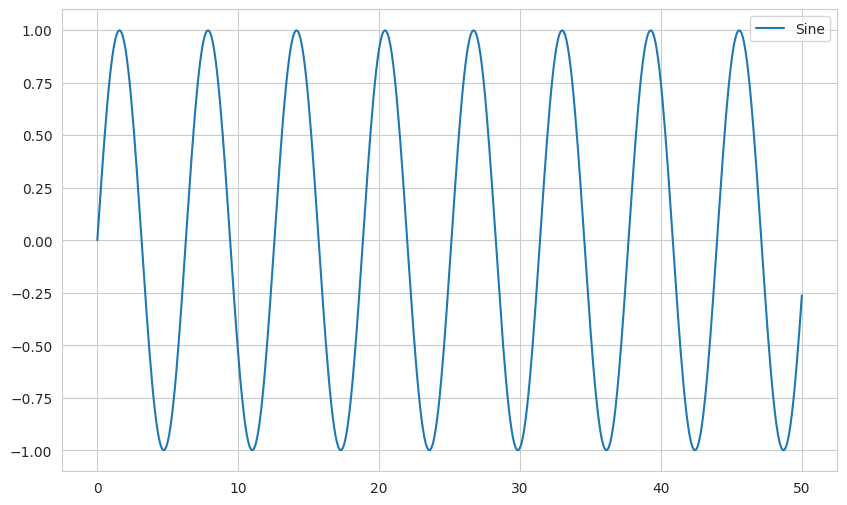

In [93]:
df.plot()

In order to visualize the forecasts and the original df, we need to create indexes for the forecasts. These indexes should also be suitable for the df. The indexes in the df went with 0.1 steps and ended at 50.00. The forecasts should follow this as 50.1, 50.2.

In [94]:
forecast_len = len(forecast)
forecast_len

64

In [95]:
step = 0.1

In [96]:
forecast_len * step

6.4

The forecast index will start from 50.1, a total of 6.4 will be added and it will reach 56.5. step=0.1. In this way, we created 64 indexes and assigned them to a variable:

In [97]:
forecast_index = np.arange(50.1, 56.5, step = step)

In [98]:
len(forecast_index)

64

We obtained a visual by drawing two plots together. We made a plot operation with df index and df column. We made the other plot operation by giving the forecast index and forecast. We saw the forecast estimates at the end of the data. (Different results can be obtained in each study.)

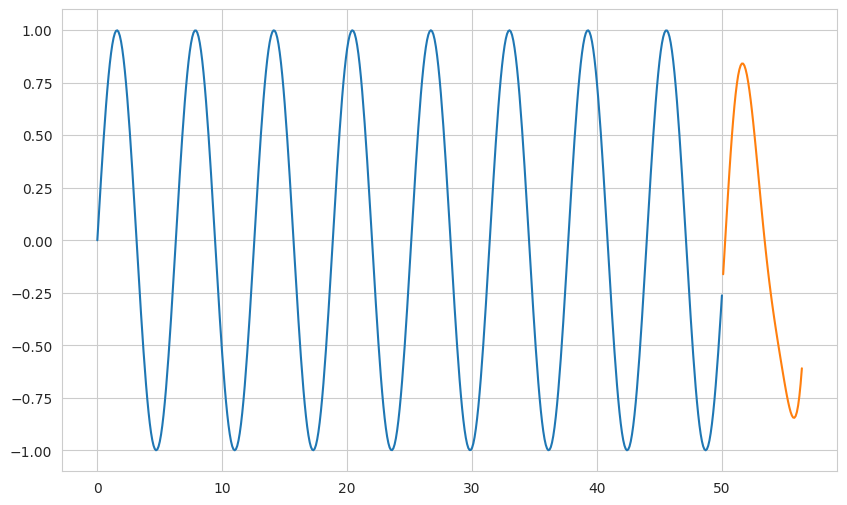

In [99]:
plt.plot(df.index, df['Sine'])
plt.plot(forecast_index, forecast);